In [ ]:
import pandas as pd

# 1. Load dataset
df = pd.read_csv("/content/menu.csv")

# 2. Inspect dataset
print(df.head())
print(df.info())
print(df.describe())

# 3. Check for missing values
print(df.isnull().sum())

# 4. Handle missing values
# Example: fill numeric columns with median, categorical with mode
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 5. Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 6. Remove duplicates
df.drop_duplicates(inplace=True)

# 7. Correct obvious errors
# Example: replace negative calories with NaN and fill with median
df['calories'] = df['calories'].apply(lambda x: df['calories'].median() if x < 0 else x)

# 8. Verify cleaning
print(df.info())
print(df.isnull().sum())


    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

In [ ]:
# Save cleaned dataset to a new CSV
df.to_csv('/content/menu_cleaned.csv', index=False)

In [ ]:
cleaned_df = pd.read_csv('/content/menu_cleaned.csv')


In [ ]:
print(df.columns)


Index(['category', 'item', 'serving_size', 'calories', 'calories_from_fat',
       'total_fat', 'total_fat_(%_daily_value)', 'saturated_fat',
       'saturated_fat_(%_daily_value)', 'trans_fat', 'cholesterol',
       'cholesterol_(%_daily_value)', 'sodium', 'sodium_(%_daily_value)',
       'carbohydrates', 'carbohydrates_(%_daily_value)', 'dietary_fiber',
       'dietary_fiber_(%_daily_value)', 'sugars', 'protein',
       'vitamin_a_(%_daily_value)', 'vitamin_c_(%_daily_value)',
       'calcium_(%_daily_value)', 'iron_(%_daily_value)'],
      dtype='object')


In [ ]:
import pandas as pd

# df is the cleaned McDonald's nutrition dataset

# 1. Numerical columns
numerical_cols = [
    'calories', 'calories_from_fat', 'total_fat', 'saturated_fat',
    'trans_fat', 'cholesterol', 'sodium', 'carbohydrates',
    'dietary_fiber', 'sugars', 'protein'
]

for col in numerical_cols:
    print(f"Column: {col}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Standard Deviation: {df[col].std()}")
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")
    print("-"*40)

# 2. Categorical columns
categorical_cols = ['category', 'item']

for col in categorical_cols:
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    print(f"Column: {col}")
    print(summary.head(10))  # show top 10 for readability
    print("-"*40)


Column: calories
Mean: 368.2692307692308
Median: 340.0
Mode: 0
Standard Deviation: 240.26988649145852
Min: 0
Max: 1880
----------------------------------------
Column: calories_from_fat
Mean: 127.09615384615384
Median: 100.0
Mode: 0
Standard Deviation: 127.8759140964374
Min: 0
Max: 1060
----------------------------------------
Column: total_fat
Mean: 14.165384615384616
Median: 11.0
Mode: 0.0
Standard Deviation: 14.205998034646512
Min: 0.0
Max: 118.0
----------------------------------------
Column: saturated_fat
Mean: 6.007692307692308
Median: 5.0
Mode: 0.0
Standard Deviation: 5.3218732061497285
Min: 0.0
Max: 20.0
----------------------------------------
Column: trans_fat
Mean: 0.20384615384615384
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4291328863592646
Min: 0.0
Max: 2.5
----------------------------------------
Column: cholesterol
Mean: 54.94230769230769
Median: 35.0
Mode: 0
Standard Deviation: 87.26925747176553
Min: 0
Max: 575
----------------------------------------
Column: sodium

Average Nutrition per Category:
                      calories  total_fat  saturated_fat       sodium  \
category                                                                
Beef & Pork         494.000000  24.866667      10.466667  1020.666667   
Beverages           113.703704   0.092593       0.055556    41.481481   
Breakfast           526.666667  27.690476      10.654762  1211.071429   
Chicken & Fish      552.962963  26.962963       6.166667  1257.777778   
Coffee & Tea        283.894737   8.021053       4.921053   136.894737   
Desserts            222.142857   7.357143       4.285714   117.142857   
Salads              270.000000  11.750000       3.750000   588.333333   
Smoothies & Shakes  531.428571  14.125000       8.375000   183.571429   
Snacks & Sides      245.769231  10.538462       2.692308   395.769231   

                    carbohydrates  dietary_fiber     sugars    protein  
category                                                                
Beef & Pork       

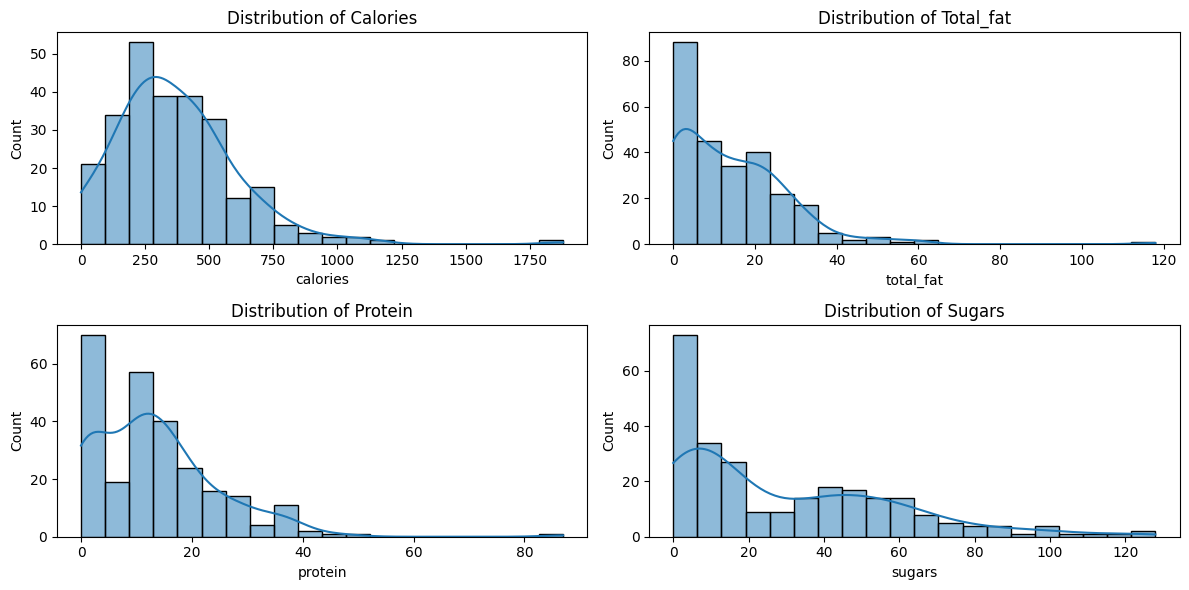

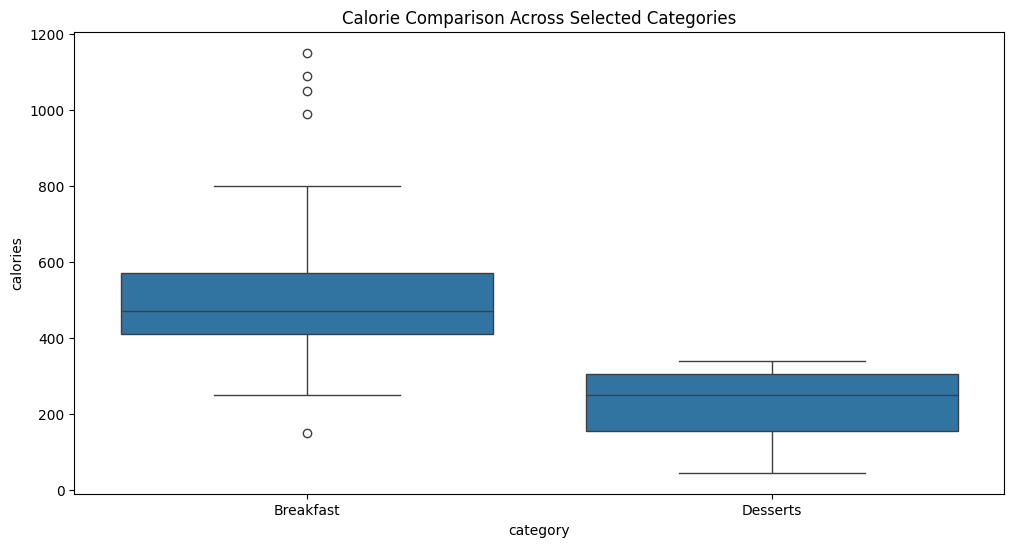

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/menu_cleaned.csv')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Numerical columns
numerical_cols = ['calories', 'total_fat', 'saturated_fat', 'sodium',
                  'carbohydrates', 'dietary_fiber', 'sugars', 'protein']

# 1. Average nutrition per category
category_means = df.groupby('category')[numerical_cols].mean()
print("Average Nutrition per Category:")
print(category_means)

# 2. Highest-calorie items
highest_calories = df[['item', 'category', 'calories']].sort_values(by='calories', ascending=False).head(10)
print("\nTop 10 Highest-Calorie Items:")
print(highest_calories)

# 3. Lowest-sugar items
lowest_sugars = df[['item', 'category', 'sugars']].sort_values(by='sugars').head(10)
print("\nTop 10 Lowest-Sugar Items:")
print(lowest_sugars)

# 4. Distribution plots
plt.figure(figsize=(12,6))
for i, col in enumerate(['calories', 'total_fat', 'protein', 'sugars']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col.capitalize()}')
plt.tight_layout()
plt.show()

# 5. Compare selected categories
selected_categories = ['Breakfast', 'Beef & Burgers', 'Desserts']
subset = df[df['category'].isin(selected_categories)]

plt.figure(figsize=(12,6))
sns.boxplot(x='category', y='calories', data=subset)
plt.title('Calorie Comparison Across Selected Categories')
plt.show()


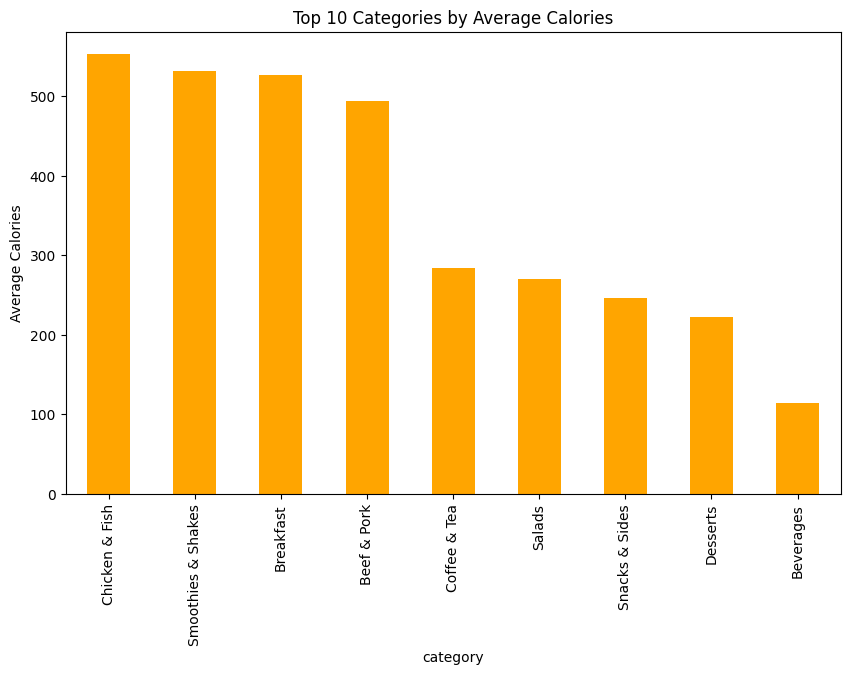

/tmp/ipython-input-3686290073.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='calories', y='item', data=top_items, palette='Reds_r')


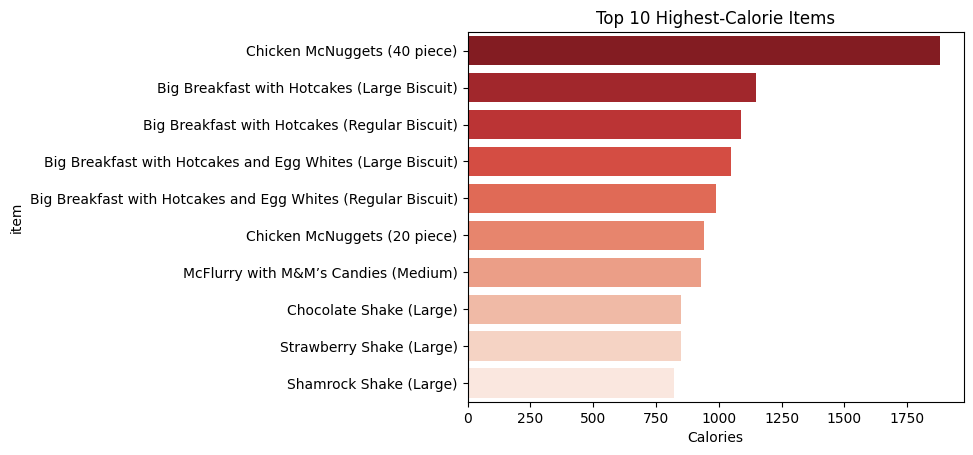

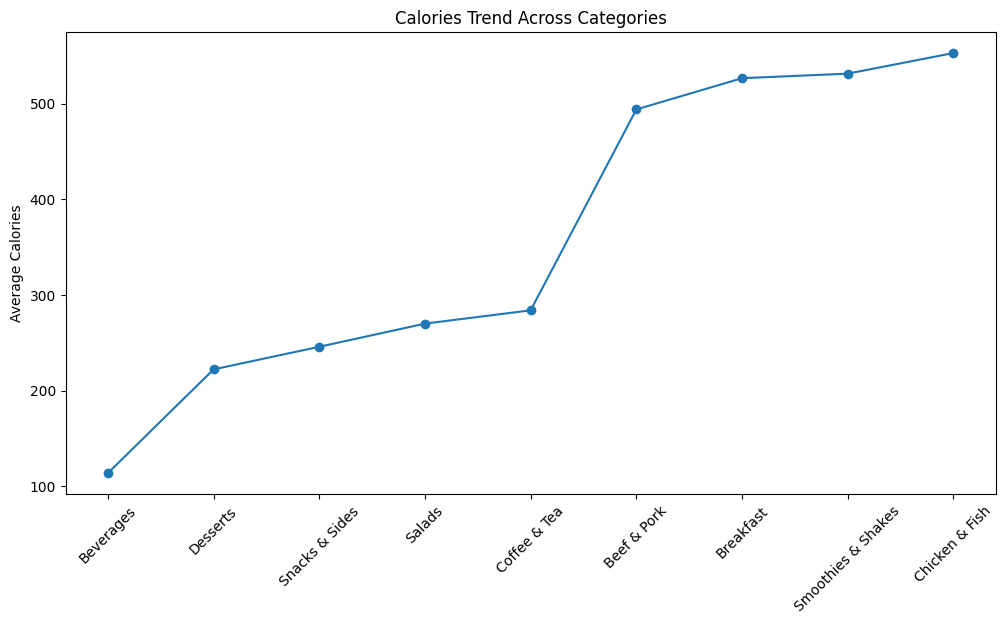

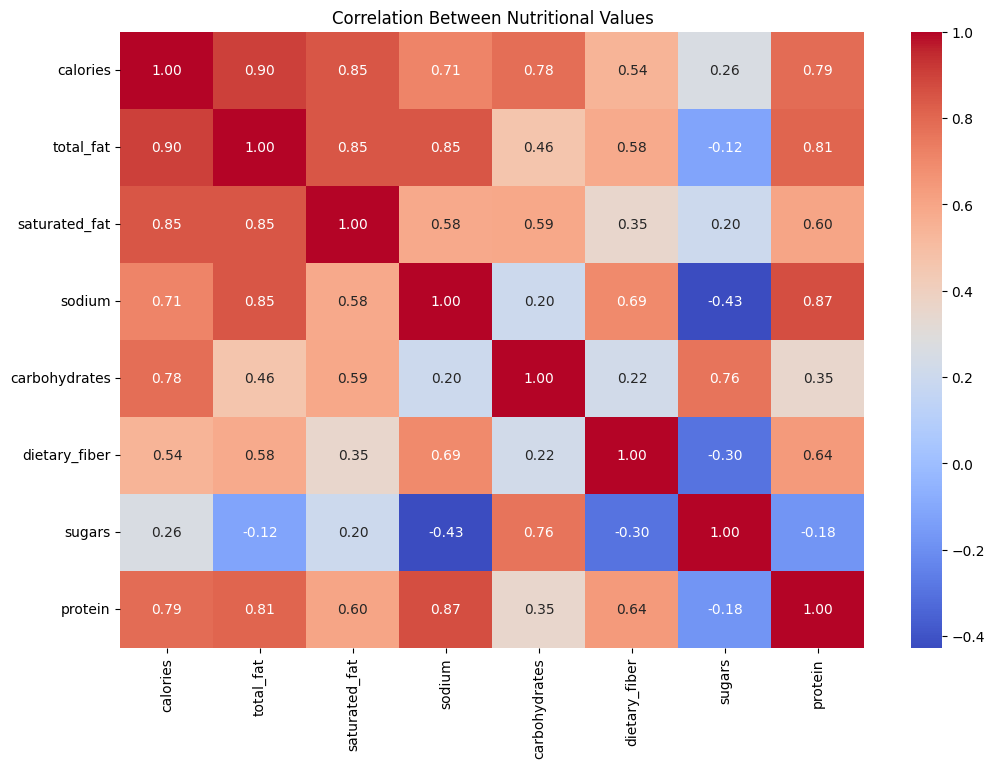

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('/content/menu_cleaned.csv')

# Numerical columns
numerical_cols = ['calories', 'total_fat', 'saturated_fat', 'sodium',
                  'carbohydrates', 'dietary_fiber', 'sugars', 'protein']

# 1. Bar Chart: Top 10 categories by average calories
category_avg_calories = df.groupby('category')['calories'].mean().sort_values(ascending=False).head(10)
category_avg_calories.plot(kind='bar', figsize=(10,6), color='orange')
plt.ylabel('Average Calories')
plt.title('Top 10 Categories by Average Calories')
plt.show()

# 2. Bar Chart: Top 10 highest-calorie items
top_items = df[['item', 'calories']].sort_values(by='calories', ascending=False).head(10)
sns.barplot(x='calories', y='item', data=top_items, palette='Reds_r')
plt.xlabel('Calories')
plt.title('Top 10 Highest-Calorie Items')
plt.show()

# 3. Line Plot: Average calories across categories (to show trends)
category_means = df.groupby('category')['calories'].mean().sort_values()
plt.figure(figsize=(12,6))
plt.plot(category_means.index, category_means.values, marker='o')
plt.xticks(rotation=45)
plt.ylabel('Average Calories')
plt.title('Calories Trend Across Categories')
plt.show()

# 4. Heatmap: Correlations between nutritional variables
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Nutritional Values')
plt.show()


**Product Recommendations**

Promote lower-calorie options for health-conscious customers.

Highlight high-protein breakfast items to appeal to fitness-focused segments.

Suggest reformulating or reviewing items with extremely high sugar or fat content.

**Category Insights**

Breakfast items generally have moderate calories but higher sugar; consider emphasizing healthier options.

Desserts and large burgers contribute most to total calorie intake; targeted portion control or combo adjustments could help.

**Marketing / Menu Recommendations**

Feature low-calorie or high-protein items in promotions.

Bundle healthier items in value meals.

Use nutritional comparisons in marketing materials to guide customer choices.